In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA

In [13]:
def ARMASeries(ARcoeffs,MAcoeffs,std,x0,nPoints):
  n_ar = len(ARcoeffs)
  n_ma = len(MAcoeffs)
  x = [x0]*(n_ar-1)
  np.random.seed()
  gaussNoise = np.random.normal(0.0,std,nPoints)
  for i in range(nPoints):
    xNew = ARcoeffs[0]
    for j in range(1,n_ar):
      xNew += ARcoeffs[j]*x[-j]
    xNew += gaussNoise[i]
    for jj in range(1,n_ma):
      xNew += MAcoeffs[jj]*gaussNoise[-jj]
    x.append(xNew)
  return x

In [18]:
armaSeries1 = ARMASeries([.1, .75,-.25],[.65, .35],1.0,0.0,250)
#plt.plot(arSeries1)
#plt.show()
# armaSeries2 = ARMASeries([1,-0.9],[1,0.5],1.0,0.0,200)
# df = pd.DataFrame({'AR1':armaSeries1,'AR2': armaSeries2})
# df.AR1.plot()
# df.AR2.plot()

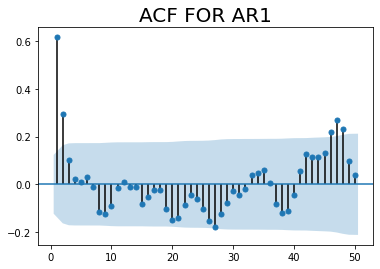

In [19]:
sgt.plot_acf(armaSeries1,zero =False,lags =50)
plt.title('ACF FOR AR1', size = 20)
plt.show()

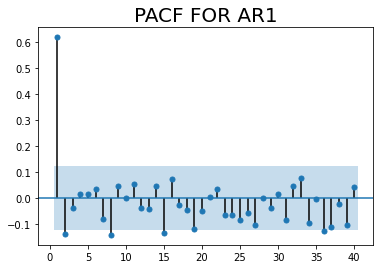

In [20]:
sgt.plot_pacf(armaSeries1,zero =False,lags =40)
plt.title('PACF FOR AR1', size = 20)
plt.show()

In [21]:
model = ARMA(armaSeries1, order=(2,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:                     ARMA(2, 2)   Log Likelihood                -341.764
Method:                       css-mle   S.D. of innovations              0.938
Date:                Sun, 17 May 2020   AIC                            695.528
Time:                        19:03:33   BIC                            716.705
Sample:                             0   HQIC                           704.049
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4357      0.131     -3.322      0.001      -0.693      -0.179
ar.L1.y        0.7099      0.614      1.156      0.248      -0.493       1.913
ar.L2.y       -0.1808      0.322     -0.561      0.575      -0.813       0.451
ma.L1.y       -0.0154      0.614     -0.025      0.980      -1.219       1.188
ma.L2.y        0.0636      0.151      0.421      0.674      -0.233       0.360
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9634           -1.2948j            2.3519           -0.0928
AR.2            1.9634           +1.2948j            2.3519            0.0928
MA.1            0.1211           -3.9639j            3.9657           -0.2451
MA.2            0.1211           +3.9639j            3.9657            0.2451
-----------------------------------------------------------------------------
"""